# 데이터셋 출처
   + https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성

   + Pregnancies : 임신 횟수
   + Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
   + BloodPressure : 이완기 혈압 (mm Hg)
   + SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
   + Insulin : 2시간 혈청 인슐린 (mu U / ml)
   + BMI : 체질량 지수 (체중kg / 키(m)^2)
   + DiabetesPedigreeFunction : 당뇨병 혈통 기능
   + Age : 나이
   + Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


# 필요한 라이브러리 로드

In [11]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [12]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

# 학습,예측 데이터 만들기

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_Insulin'],
      dtype='object')

In [14]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
    'Insulin_nan', 'low_glu_Insulin']]
X.shape

(768, 9)

In [15]:
y = df["Outcome"]
y.shape

(768,)

In [16]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split 으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42)

In [17]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [18]:
# test 세트의 문제와 정답을 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 학습과 예측하기

In [19]:
# DecisionTree 를 불러 옵니다.

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model

DecisionTreeClassifier(max_depth=5, random_state=42)

In [31]:
# 학습을 시킵니다.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=11, random_state=42)

In [34]:
feature_names=X_train.columns.tolist()

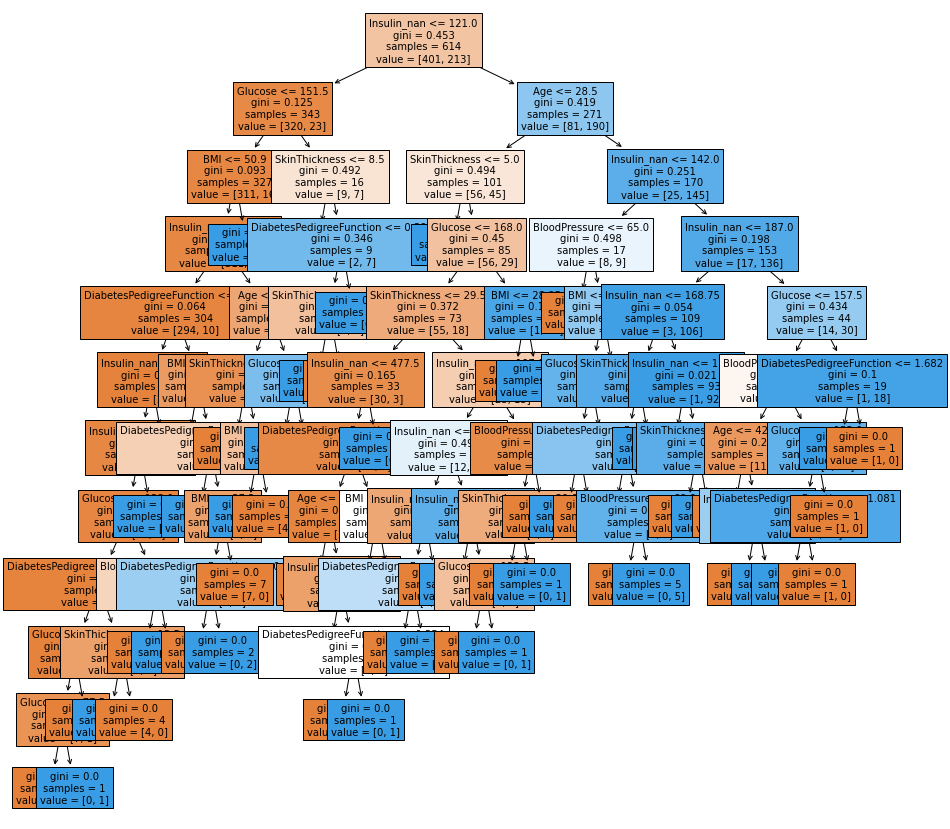

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 15))
tree = plot_tree(model, feature_names=feature_names, fontsize=10, filled=True)

## 최적의 max_depth 값 찾기

In [30]:
from sklearn.metrics import accuracy_score

for max_depth in range(3, 12):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    y_predict = model.fit(X_train, y_train).predict(X_test)
    score = accuracy_score(y_test, y_predict) * 100
    print(max_depth, score)

3 85.06493506493507
4 87.66233766233766
5 85.71428571428571
6 81.81818181818183
7 81.81818181818183
8 81.81818181818183
9 83.76623376623377
10 79.22077922077922
11 81.81818181818183


# Grid Search

   + https://sklearn.org/modules/cross_validation.html#cross-validation
   + https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [21]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)
param_grid = {"max_depth" : range(3,12), 
              "max_features": [0.3, 0.5, 0.7, 0.9, 1]}
clf = GridSearchCV(model, param_grid=param_grid, n_jobs=-1, cv=5, verbose=1)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 214 out of 225 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:    2.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(3, 12),
                         'max_features': [0.3, 0.5, 0.7, 0.9, 1]},
             verbose=1)

In [22]:
clf.best_params_

{'max_depth': 5, 'max_features': 0.7}

In [23]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.7, random_state=42)

In [24]:
clf.best_score_

0.8664934026389444

In [25]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
12,0.003600,0.000477,0.001999,0.000642,5,0.7,"{'max_depth': 5, 'max_features': 0.7}",0.878049,0.910569,0.813008,0.837398,0.893443,0.866493,0.036082,1
7,0.004602,0.001750,0.002210,0.000391,4,0.7,"{'max_depth': 4, 'max_features': 0.7}",0.813008,0.886179,0.829268,0.861789,0.918033,0.861655,0.037935,2
8,0.006207,0.003453,0.002297,0.000398,4,0.9,"{'max_depth': 4, 'max_features': 0.9}",0.821138,0.886179,0.853659,0.853659,0.893443,0.861615,0.026005,3
18,0.012797,0.016607,0.002200,0.000989,6,0.9,"{'max_depth': 6, 'max_features': 0.9}",0.829268,0.894309,0.821138,0.878049,0.877049,0.859963,0.029149,4
27,0.004000,0.000643,0.002110,0.000207,8,0.7,"{'max_depth': 8, 'max_features': 0.7}",0.861789,0.878049,0.837398,0.853659,0.860656,0.858310,0.013162,5
17,0.004300,0.000396,0.002106,0.000199,6,0.7,"{'max_depth': 6, 'max_features': 0.7}",0.861789,0.869919,0.804878,0.894309,0.860656,0.858310,0.029337,5
31,0.004808,0.001174,0.001794,0.000398,9,0.5,"{'max_depth': 9, 'max_features': 0.5}",0.853659,0.902439,0.780488,0.861789,0.885246,0.856724,0.041834,7
11,0.003594,0.000584,0.002401,0.000497,5,0.5,"{'max_depth': 5, 'max_features': 0.5}",0.837398,0.878049,0.821138,0.878049,0.868852,0.856697,0.023222,8
1,0.005585,0.001849,0.001795,0.000398,3,0.5,"{'max_depth': 3, 'max_features': 0.5}",0.780488,0.910569,0.813008,0.853659,0.918033,0.855151,0.053625,9
6,0.004195,0.001168,0.001995,0.000632,4,0.5,"{'max_depth': 4, 'max_features': 0.5}",0.788618,0.886179,0.804878,0.878049,0.918033,0.855151,0.049790,9


In [26]:
clf.predict(X_test)

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [27]:
clf.score(X_test, y_test)

0.8701298701298701

In [115]:
max_depth = np.random.randint(3, 20, 10)
max_depth

array([ 8, 18, 19, 10, 13, 14,  6, 10,  5, 18])

In [116]:
model

DecisionTreeClassifier(max_depth=11, random_state=42)

In [117]:
max_features = np.random.uniform(0.7, 1.0, 100)
max_features

array([0.83633038, 0.74861265, 0.71181176, 0.85269683, 0.95195991,
       0.75341538, 0.73221991, 0.94337832, 0.90571922, 0.87123332,
       0.88308028, 0.99367913, 0.97570684, 0.88508579, 0.90183762,
       0.75223933, 0.92925939, 0.8839033 , 0.84176124, 0.85353983,
       0.82520951, 0.88708558, 0.96912671, 0.73059442, 0.83919151,
       0.78138839, 0.84915435, 0.92089009, 0.83009842, 0.83457783,
       0.98973822, 0.81104631, 0.95540852, 0.70155893, 0.73061245,
       0.71429022, 0.76176758, 0.82724944, 0.84460289, 0.85852034,
       0.94481893, 0.75548946, 0.90187789, 0.96232807, 0.73846432,
       0.91087977, 0.81558147, 0.84043473, 0.70017115, 0.82739081,
       0.85837847, 0.90063412, 0.79525192, 0.72388785, 0.79401141,
       0.94849393, 0.91779715, 0.80146292, 0.83286969, 0.70630098,
       0.71691762, 0.87941031, 0.85340817, 0.91608303, 0.71968535,
       0.9200284 , 0.82432293, 0.79807953, 0.98080701, 0.93569835,
       0.79251217, 0.87684899, 0.8311416 , 0.93787954, 0.97662

In [118]:
param_distributions = {"max_depth" : max_depth, 
                       "max_features" : max_features, 
                       "min_samples_split" : list(range(2, 7))}
param_distributions

{'max_depth': array([ 8, 18, 19, 10, 13, 14,  6, 10,  5, 18]),
 'max_features': array([0.83633038, 0.74861265, 0.71181176, 0.85269683, 0.95195991,
        0.75341538, 0.73221991, 0.94337832, 0.90571922, 0.87123332,
        0.88308028, 0.99367913, 0.97570684, 0.88508579, 0.90183762,
        0.75223933, 0.92925939, 0.8839033 , 0.84176124, 0.85353983,
        0.82520951, 0.88708558, 0.96912671, 0.73059442, 0.83919151,
        0.78138839, 0.84915435, 0.92089009, 0.83009842, 0.83457783,
        0.98973822, 0.81104631, 0.95540852, 0.70155893, 0.73061245,
        0.71429022, 0.76176758, 0.82724944, 0.84460289, 0.85852034,
        0.94481893, 0.75548946, 0.90187789, 0.96232807, 0.73846432,
        0.91087977, 0.81558147, 0.84043473, 0.70017115, 0.82739081,
        0.85837847, 0.90063412, 0.79525192, 0.72388785, 0.79401141,
        0.94849393, 0.91779715, 0.80146292, 0.83286969, 0.70630098,
        0.71691762, 0.87941031, 0.85340817, 0.91608303, 0.71968535,
        0.9200284 , 0.82432293, 0.798

In [128]:
from sklearn.model_selection import RandomizedSearchCV

clf = RandomizedSearchCV( model,
                    param_distributions,
                    n_iter=1000,
                    scoring="accuracy",
                    n_jobs=-1,
                    cv=5,
                    random_state=42
                  )
clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=11,
                                                    random_state=42),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'max_depth': array([ 8, 18, 19, 10, 13, 14,  6, 10,  5, 18]),
                                        'max_features': array([0.83633038, 0.74861265, 0.71181176, 0.85269683, 0.95195991,
       0.75341538, 0.73221991, 0.94337832, 0.90571922, 0.87123332,
       0.88308028, 0.99367913, 0.97570684, 0.88508...
       0.79251217, 0.87684899, 0.8311416 , 0.93787954, 0.9766269 ,
       0.75279267, 0.99814488, 0.99203107, 0.8419284 , 0.83767991,
       0.7681089 , 0.76108609, 0.76436629, 0.90993717, 0.79458491,
       0.97267324, 0.88036718, 0.90801791, 0.92587761, 0.70973154,
       0.91066687, 0.86564976, 0.99773079, 0.89383566, 0.76265594,
       0.73660555, 0.77350378, 0.90907644, 0.90645984, 0.95212688]),
                                        'min_s

In [129]:
clf.best_params_

{'min_samples_split': 4, 'max_features': 0.8311416041491986, 'max_depth': 10}

In [130]:
clf.best_score_

0.8713847794215648

In [131]:
clf.score(X_test, y_test)

0.8571428571428571

In [132]:
pd.DataFrame(clf.cv_results_).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
772,0.004994,0.002535,0.001907,0.000196,4,0.824323,10,"{'min_samples_split': 4, 'max_features': 0.824...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
813,0.004800,0.000981,0.010588,0.018191,4,0.841761,10,"{'min_samples_split': 4, 'max_features': 0.841...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
668,0.004223,0.000543,0.002096,0.001017,4,0.876849,10,"{'min_samples_split': 4, 'max_features': 0.876...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
481,0.004000,0.000013,0.001603,0.000792,4,0.86565,10,"{'min_samples_split': 4, 'max_features': 0.865...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1
887,0.004096,0.000669,0.001901,0.000497,4,0.815581,10,"{'min_samples_split': 4, 'max_features': 0.815...",0.910569,0.886179,0.813008,0.845528,0.901639,0.871385,0.036731,1


# 정확도(Accuracy)측정하기

In [28]:
# 다르게 예측한 개수를 구해서 diff_count 에 할당해 줍니다.

abs(y_predict - y_test).sum()

23

In [29]:
# accuracy score 를 구합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

85.06493506493507

# 머신러닝 알고리즘 가져오기

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(, random_state=42)
model

# 학습(훈련)
   + 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [ ]:
model.fit(X_train, y_train)

# 예측
   + 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [ ]:
y_predict = model.predict(X_test)
y_predict[:5]

# 트리 알고리즘 분석하기
   + 의사결정나무를 시각화합니다.

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model,
                 feature_names=feature_names,
                 filled=True,
                 fontsize=10)

In [ ]:
# graphviz 를 통해 시각화합니다.
# graphviz 는 별도의 설치가 필요합니다.
# graphviz 와 파이썬에서 graphviz 를 사용할 수 있게 해주는 도구 2가지를 설치해주셔야 합니다.
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model,
                            feature_names = feature_names,
                            filled=True)
graphviz.Source(dot_tree)

In [ ]:
# 피처의 중요도를 추출하기

model.feature_importances_

In [ ]:
# 피처의 중요도 시각화하기

sns.barplot(x=model.feature_importances_, y = feature_names)

In [ ]:
# 실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됩니다.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 됩니다.
# 44 => 39(Pregnancies_high) => 49(나이25세 기준) => 55(나이30세 기준)) 
# => 23(인슐린 결측치를 평균으로 대체) => 16(인슐린 결측치를 중앙값으로 대체)
# 15(파생변수 low_glu_insulin 추가)
# => 15(인슐린 수치 600 이상 제거)
# => 15(Glucose, DiabetesPedigreeFunction 스케일링)
diff_count = abs(y_test - y_predict).sum() 
diff_count

In [ ]:
# 예측의 정확도를 구합니다. 100점 만점에 몇 점을 맞았는지 구한다고 보면 됩니다.

(len(y_test) - diff_count) / len(y_test) * 100

In [ ]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

In [ ]:
# model 의 score 로 점수를 계산합니다.

model.score(X_test,y_test)